<a href="https://colab.research.google.com/github/sksamima5/Bike-Sharing-Demand-Prediction-/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

#**Importing the Libraries**

In [2]:
#Lets Import the essential modules

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import log_loss

import warnings
warnings.filterwarnings('ignore')

#**Mount the drive and Import the Dataset** 

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#Readind CSV file and load the data
bike_df = pd.read_csv('/content/drive/MyDrive/Capstone Project (Bike share prediction)/SeoulBikeData.csv', encoding = 'latin')

#**Let's Explore and Understand about the data** 

In [5]:
#Checking top first 5 rows of Data
bike_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [6]:
#Checking last 5 rows(tail) of Data
bike_df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [7]:
#Checking the shape of Dataset with rows and columns 
print(f' The shape of dataset is {(bike_df.shape)} \n Total Rows are : {(bike_df.shape)[0]}\n Total Columns are : {(bike_df.shape)[1]}')

 The shape of dataset is (8760, 14) 
 Total Rows are : 8760
 Total Columns are : 14


In [8]:
#Checking deatils about the data
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [9]:
#Checking all the columns of dataset
print(f'All the columns in the dataset:')
bike_df.columns

All the columns in the dataset:


Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [10]:
#Print all the unique values of Dataset
bike_df.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

In [11]:
#checking the description of dataset
bike_df.describe(include = 'all')

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760,8760
unique,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,2
top,01/12/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,No Holiday,Yes
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2208,8328,8465
mean,NaN,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,NaN,NaN,NaN
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,NaN,NaN,NaN
min,NaN,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,NaN,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,NaN,NaN,NaN
75%,NaN,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,NaN,NaN,NaN


#**Feature Description**

**Breakdown of Our Features:**

**Date** : *The date of the day, during 365 days from 01/12/2017 to 30/11/2018, formating in DD/MM/YYYY,  type : str*,  we need to convert into datetime format.


**Rented Bike Count** : *Number of rented bikes per hour which our dependent variable and we need to predict that,  type : int*


**Hour**: *The hour of the day, starting from 0-23 it's in a digital time format,  type : int, we need to convert it into category data type.*


**Temperature(°C)**: *Temperature in Celsius,  type : Float*


**Humidity(%)**: *Humidity in the air in %,  type : int*


**Wind speed (m/s)** : *Speed of the wind in m/s,  type : Float*


**Visibility (10m)**: *Visibility in m,  type : int*


**Dew point temperature(°C)**: *Temperature at the beggining of the day,  type : Float*


**Solar Radiation (MJ/m2)**: *Sun contribution,  type : Float*


**Rainfall(mm)**: *Amount of raining in mm,  type : Float*


**Snowfall (cm)**: *Amount of snowing in cm,  type : Float*


**Seasons**: *Season of the year,  type : str, there are only 4 season's in data *. 

**Holiday**: *If the day  is holiday period or not, type: str*


**Functioning Day**: *If the day is a Functioning Day or not, type : str*

#**Preprocessing the Dataset**

**Missing values**
* **The handling of missing data is very important during the preprocessing of the dataset as many machine learning algorithms do not support missing values.that's why we check missing values first.**



In [12]:
#Checking the Null/Missing values
bike_df.isnull().sum()


Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

* **As we can see above there are no missing values present in the data**

**Duplicate Value** 
* **"Duplication" just means that you have repeated data in your dataset. This could be due to things like data entry errors or data collection methods. by removing duplication in our data set,  Time and money are saved by not sending identical communications multiple times to the same person.**

In [13]:
#Checking the Duplicate values
bike_df.duplicated().sum()

0

* **As we can see above there are no Duplicates values present in the data**

#**Renaming some Columns name (For Modelling purpose)**
* **Since the variables having units with name, so renaming columns for better variable analysis**



In [14]:
#Renaming some columns name
bike_df = bike_df.rename(columns = {'Rented Bike Count' : 'Rented_Bike_Count',
                                    'Temperature(°C)':'Temperature',
                                    'Humidity(%)':'Humidity',
                                    'Wind speed (m/s)': 'Wind_speed',
                                    'Visibility (10m)':'Visibility',
                                    'Dew point temperature(°C)': 'Dew_point_temperature', 
                                    'Solar Radiation (MJ/m2)': 'Solar_Radiation',
                                    'Rainfall(mm)':'Rainfall',
                                    'Snowfall (cm)':'Snowfall', 
                                    'Functioning Day':'Functioning_Day'})

#**Breaking Date Column**

* **Python read "Date" column as a object type so we need to convert it into datetime format then we split it into 3 column i.e 'year', 'month', 'day'as a category data type.**


In [15]:
# Changing the "Date" column into three "year","month","day" column
bike_df['Date']=bike_df['Date'].astype('datetime64[ns]')

bike_df['year'] = bike_df['Date'].dt.year
bike_df['Month'] = bike_df['Date'].dt.month
bike_df['day'] = bike_df['Date'].dt.day_name()

In [16]:
#creating a new column 'weekdays_weekends' and drop column 'date', 'day', 'year'
bike_df['weekdays_weekends'] = bike_df['day'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0)
bike_df=bike_df.drop(columns = ['Date','day','year'],axis = 1 )

In [17]:
bike_df.head()

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,Month,weekdays_weekends
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0


* **As we can see following above in the data**

 ***We convert the "date" column into 3 different column i.e "year","month","day".***

 ***The "year" column in our data set is basically contain the 2 unique years contains the details of from 2017 december to 2018 november so if we consider this is a one year then we don't need the "year" column so we decided to drop it***.

 ***The other "day" column, it contain the details about the each day of the month, for our relevence we don't need each day of each month data but we need the data about, if a day is a weekday or a weekend so we convert it into this format and drop the "day" column***.

#**Let's check the Data type**

In [18]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rented_Bike_Count      8760 non-null   int64  
 1   Hour                   8760 non-null   int64  
 2   Temperature            8760 non-null   float64
 3   Humidity               8760 non-null   int64  
 4   Wind_speed             8760 non-null   float64
 5   Visibility             8760 non-null   int64  
 6   Dew_point_temperature  8760 non-null   float64
 7   Solar_Radiation        8760 non-null   float64
 8   Rainfall               8760 non-null   float64
 9   Snowfall               8760 non-null   float64
 10  Seasons                8760 non-null   object 
 11  Holiday                8760 non-null   object 
 12  Functioning_Day        8760 non-null   object 
 13  Month                  8760 non-null   int64  
 14  weekdays_weekends      8760 non-null   int64  
dtypes: f

In [19]:
#Let's check the value counts for Seasons categories
bike_df['Seasons'].value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

In [20]:
#Let's check the value counts for Holiday categories
bike_df['Holiday'].value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

In [21]:
#Let's check the value counts for Functioning_Day categories
bike_df['Functioning_Day'].value_counts()

Yes    8465
No      295
Name: Functioning_Day, dtype: int64

In [22]:
#Let's check the value counts for month categories
bike_df['Month'].value_counts()

1     744
3     744
5     744
7     744
8     744
10    744
12    744
4     720
6     720
9     720
11    720
2     672
Name: Month, dtype: int64

In [23]:
#Let's check the value counts for Hour categories
bike_df['Hour'].value_counts()

0     365
1     365
22    365
21    365
20    365
19    365
18    365
17    365
16    365
15    365
14    365
13    365
12    365
11    365
10    365
9     365
8     365
7     365
6     365
5     365
4     365
3     365
2     365
23    365
Name: Hour, dtype: int64

# **Exploratory Data Analysis of the Data Set**

In [24]:
#Create a Numerical columns 
numeric_col=bike_df.describe().columns.tolist()
numeric_col

['Rented_Bike_Count',
 'Hour',
 'Temperature',
 'Humidity',
 'Wind_speed',
 'Visibility',
 'Dew_point_temperature',
 'Solar_Radiation',
 'Rainfall',
 'Snowfall',
 'Month',
 'weekdays_weekends']

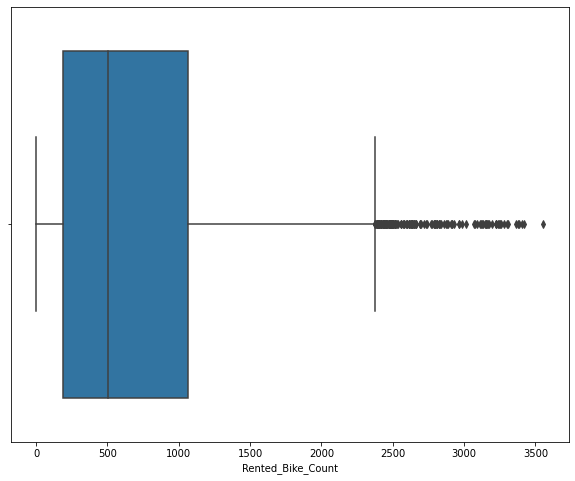

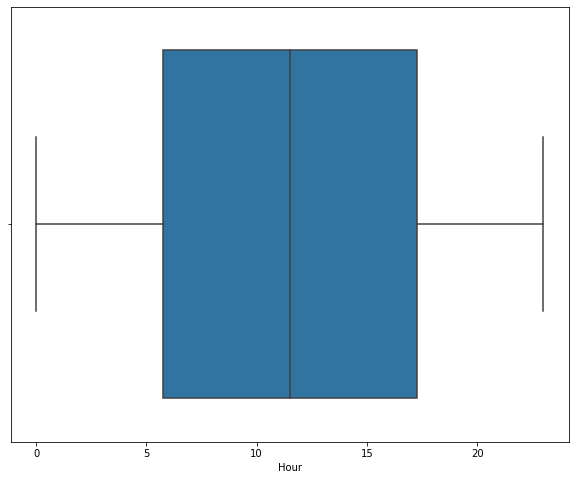

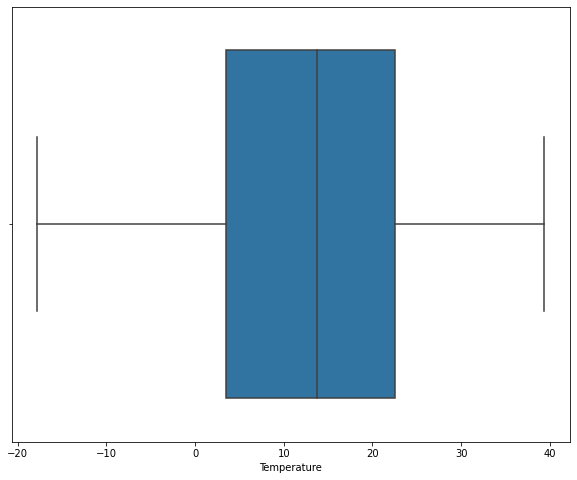

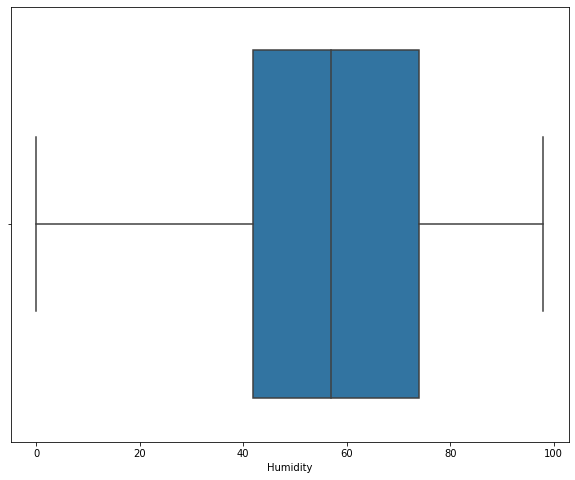

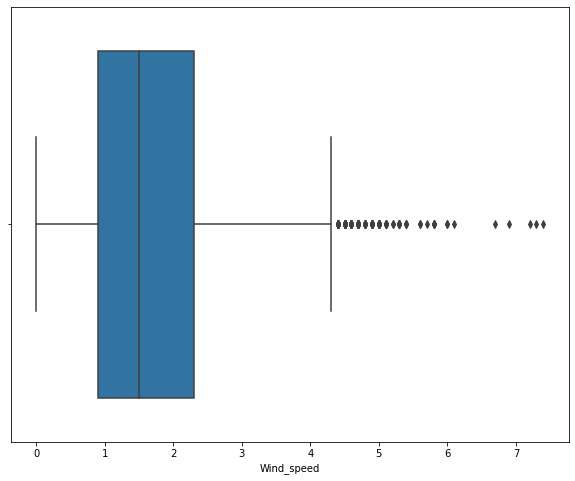

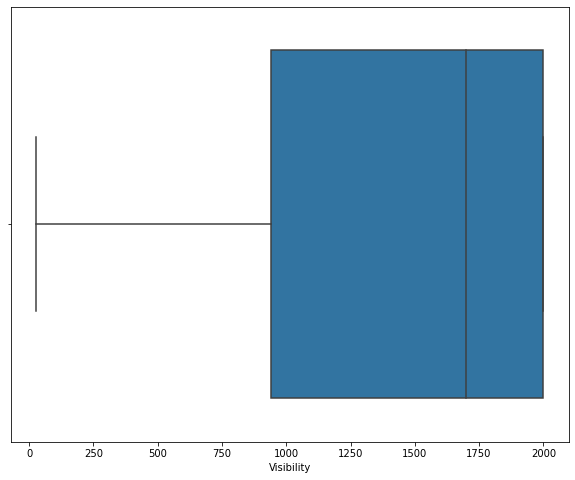

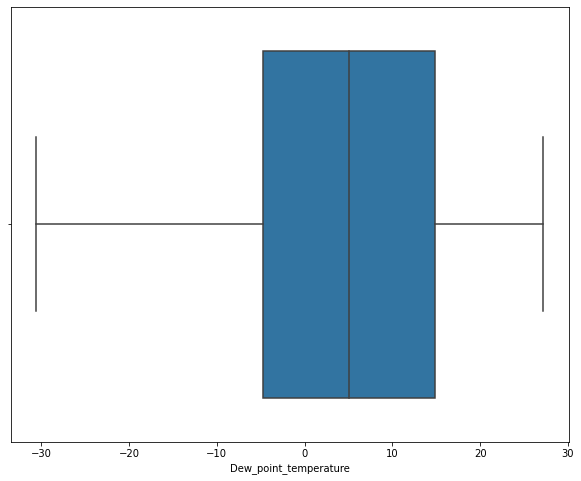

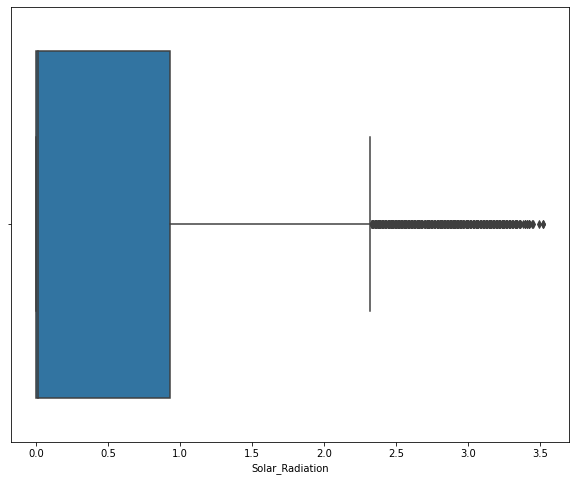

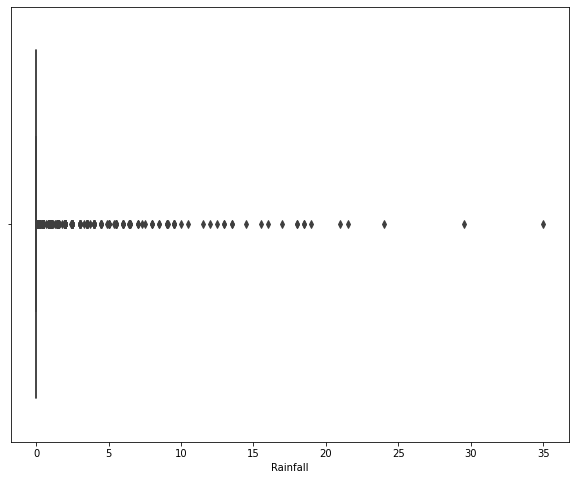

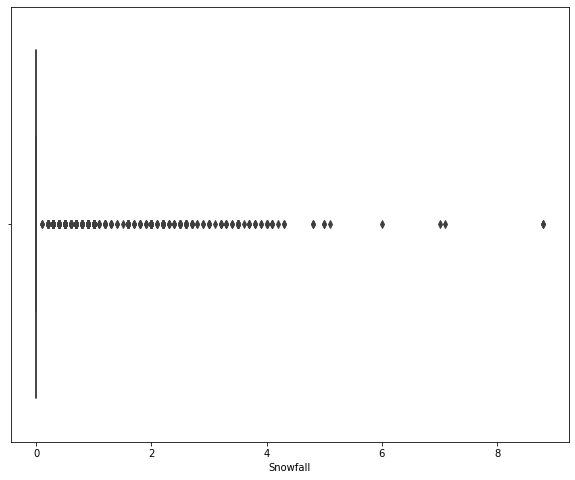

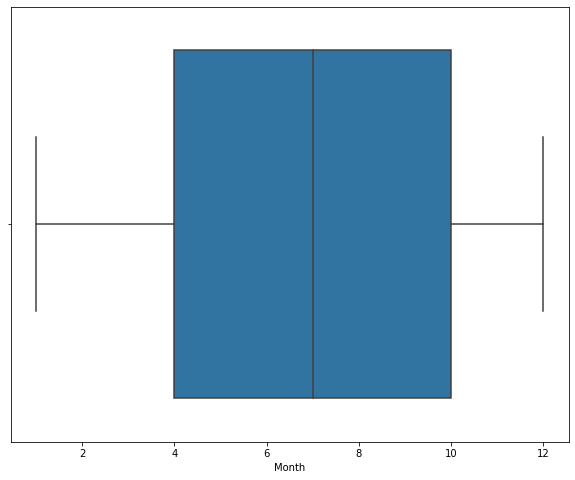

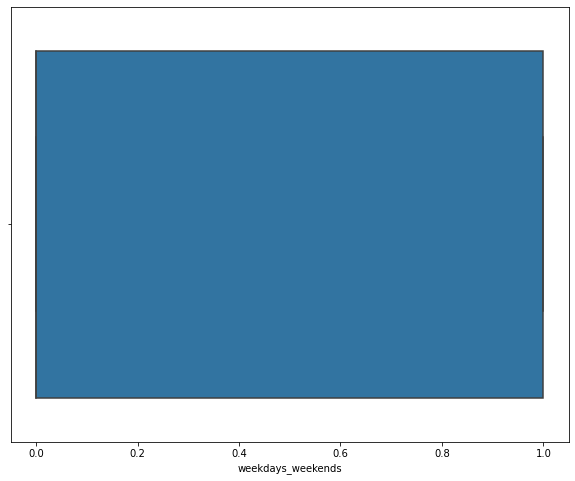

In [25]:
#Create a Boxplot for all the Numerical column to checking the outliers
for col in numeric_col:
    fig = plt.figure(figsize=(10, 8))
    ax = fig.gca()
    sns.boxplot(x=bike_df[col])

* **As "Hour","Month","weekdays_weekends" column are show as a integer data type but actually it is a category data tyepe. so we need to change this data type.**

In [26]:
#Changing int64 column to category column
cols = ['Hour','Month','weekdays_weekends']
for col in cols:
  bike_df[col]= bike_df[col].astype('category')

In [27]:
#Lets check the data type
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Rented_Bike_Count      8760 non-null   int64   
 1   Hour                   8760 non-null   category
 2   Temperature            8760 non-null   float64 
 3   Humidity               8760 non-null   int64   
 4   Wind_speed             8760 non-null   float64 
 5   Visibility             8760 non-null   int64   
 6   Dew_point_temperature  8760 non-null   float64 
 7   Solar_Radiation        8760 non-null   float64 
 8   Rainfall               8760 non-null   float64 
 9   Snowfall               8760 non-null   float64 
 10  Seasons                8760 non-null   object  
 11  Holiday                8760 non-null   object  
 12  Functioning_Day        8760 non-null   object  
 13  Month                  8760 non-null   category
 14  weekdays_weekends      8760 non-null   c

#**Let's plot barchart plot for each columns with respect to target variable to get insights**

[Text(0.5, 1.0, 'Count of Rented bikes acording to Hour')]

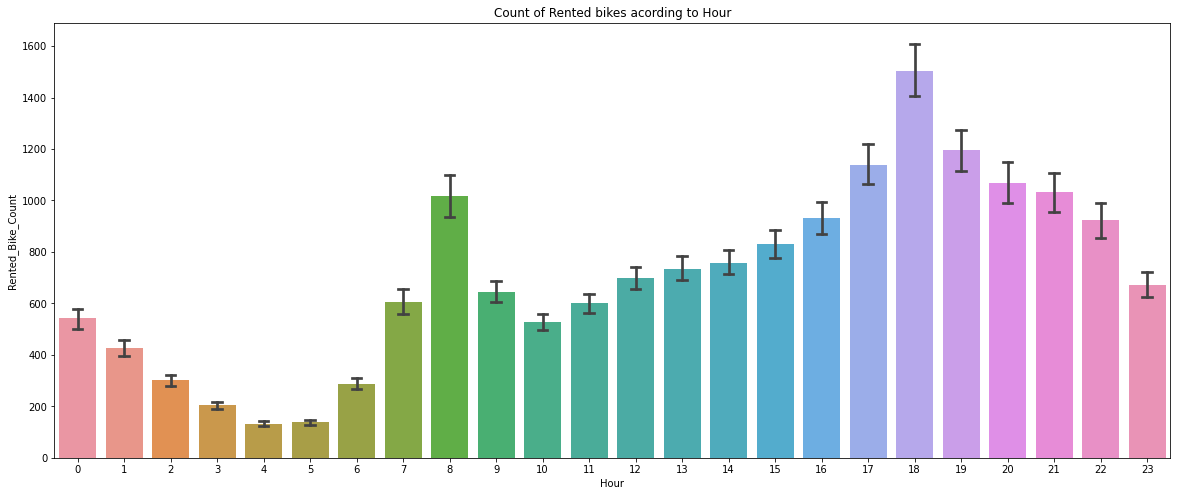

In [28]:
#analysis of Hour data by vizualisation
fig,ax=plt.subplots(figsize=(20,8))
sns.barplot(data=bike_df,x='Hour',y='Rented_Bike_Count',capsize=.2)
ax.set(title='Count of Rented bikes acording to Hour')

##**Observation**
* **In the above plot which shows the use of rented bike according the hours.**

* **Generally people use rented bikes during their working hours from 7am to 9am and 5pm to 7pm.(Office and college going time could be the reason for this sudden peak)**

* **But on Holidays the case is different (Less Bike rentals happened).**
* **Again there is peak between 10 AM to 7 PM. may be its office or college leaving time for the above people.(Except Holiday).**   

[Text(0.5, 1.0, 'Count of Rented bikes acording to Month')]

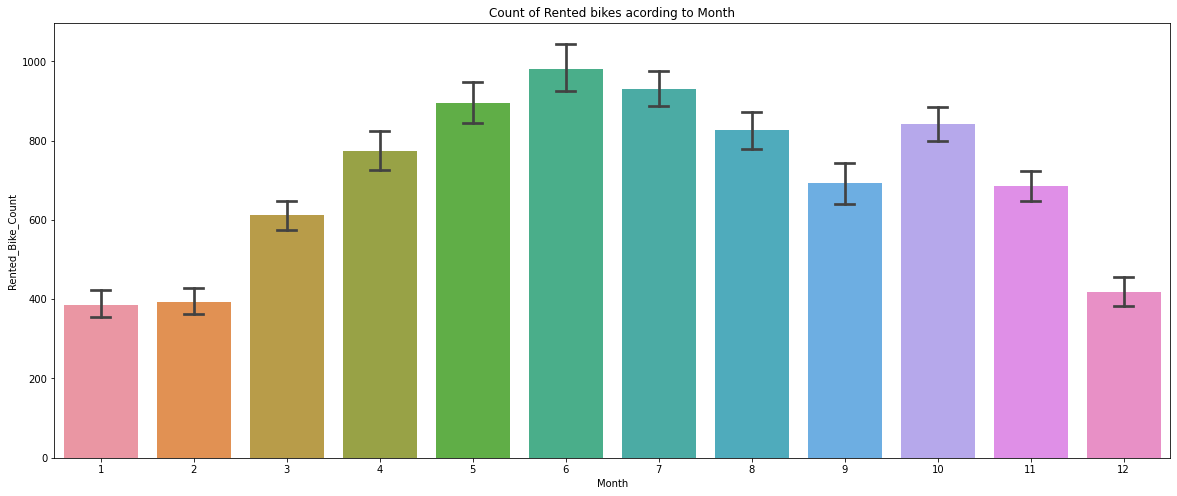

In [29]:
#analysis of Month data by vizualisation
fig,ax=plt.subplots(figsize=(20,8))
sns.barplot(data=bike_df, x='Month', y='Rented_Bike_Count', capsize=.2)
ax.set(title='Count of Rented bikes acording to Month')

[Text(0.5, 1.0, 'Count of Rented bikes acording to Month')]

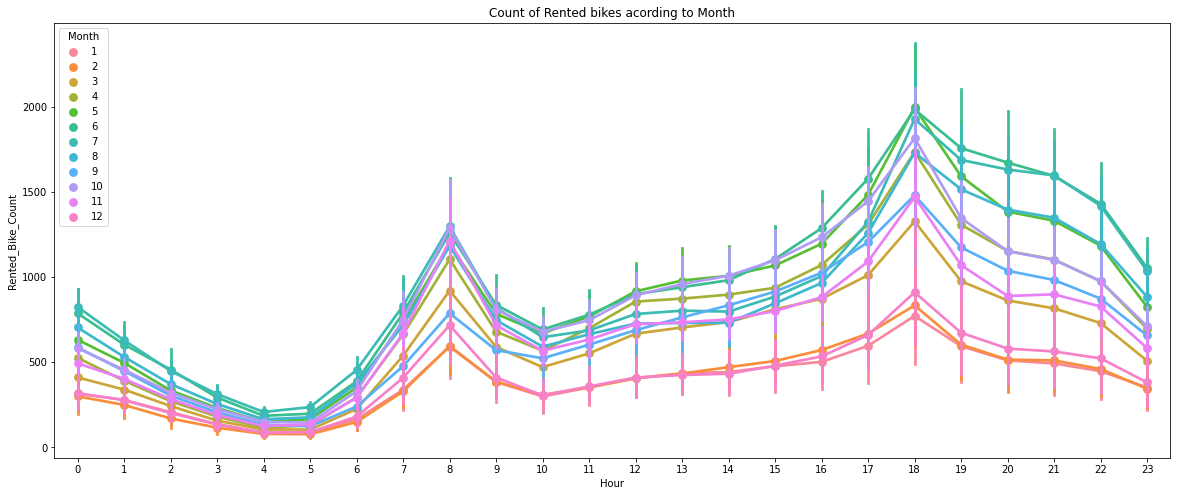

In [30]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=bike_df,x='Hour',y='Rented_Bike_Count',hue='Month',ax=ax)
ax.set(title='Count of Rented bikes acording to Month')

##**Observation**
* **From the above bar and point plot we can clearly say that from the month 5th to 10th the demand of the rented bike is high as compare to other months.these months are comes inside the summer season.**

[Text(0.5, 1.0, 'Count of Rented bikes acording to Seasons')]

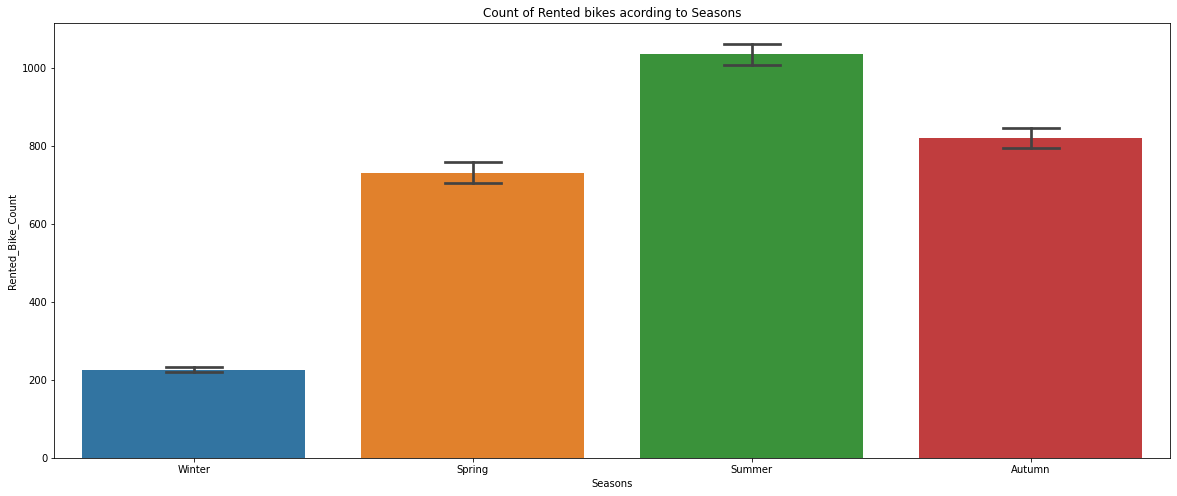

In [31]:
#analysis of Seasons data by vizualisation
fig,ax=plt.subplots(figsize=(20,8))
sns.barplot(data=bike_df,x='Seasons', y='Rented_Bike_Count', capsize=.2)
ax.set(title='Count of Rented bikes acording to Seasons')

[Text(0.5, 1.0, 'Count of Rented bikes acording to Seasons')]

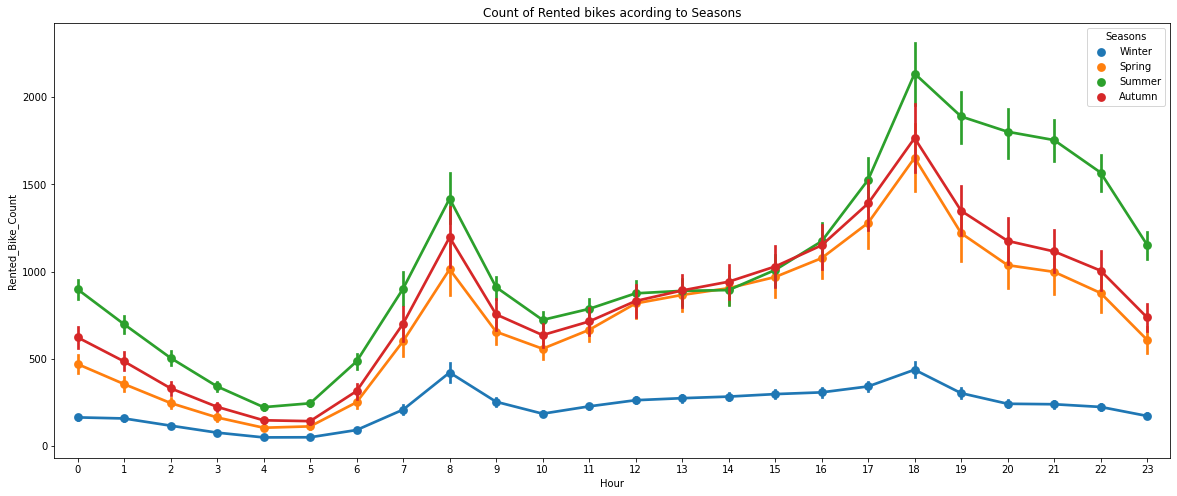

In [32]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=bike_df,x='Hour',y='Rented_Bike_Count',hue='Seasons',ax=ax)
ax.set(title='Count of Rented bikes acording to Seasons')

##**Observation**
* **In the above bar plot and point plot which shows the use of rented bikes in four different seasons, and it clearly shows that :**
* **In Summer, Autumn and Spring seasons the use of rented bike is high and peak time is 7am-9am and 5pm-7pm.**
* **But In winter season the use of rented bike is very low because of snowfall.**

[Text(0.5, 1.0, 'Count of Rented bikes acording to Holidays')]

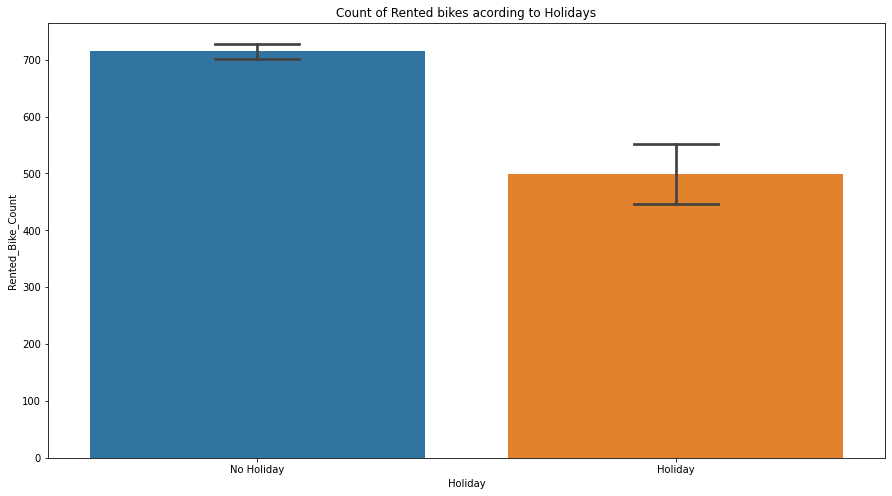

In [33]:
#analysis of Holiday data by vizualisation
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(data=bike_df,x='Holiday',y='Rented_Bike_Count',capsize=.2)
ax.set(title='Count of Rented bikes acording to Holidays')

[Text(0.5, 1.0, 'Count of Rented bikes acording to Holiday ')]

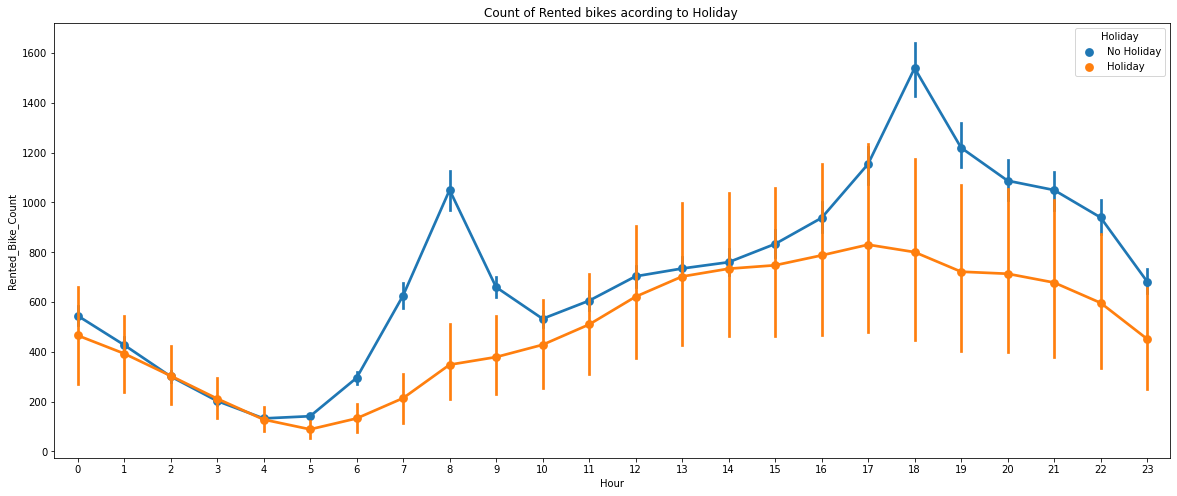

In [34]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=bike_df,x='Hour',y='Rented_Bike_Count',hue='Holiday',ax=ax)
ax.set(title='Count of Rented bikes acording to Holiday ')

##**Observation**
* **In the above bar plot and point plot shows that the use of rented bike in a holiday**
* **In holiday people uses the rented bikes Mostly from 2pm-8pm**

[Text(0.5, 1.0, 'Count of Rented bikes acording to Functioning Day ')]

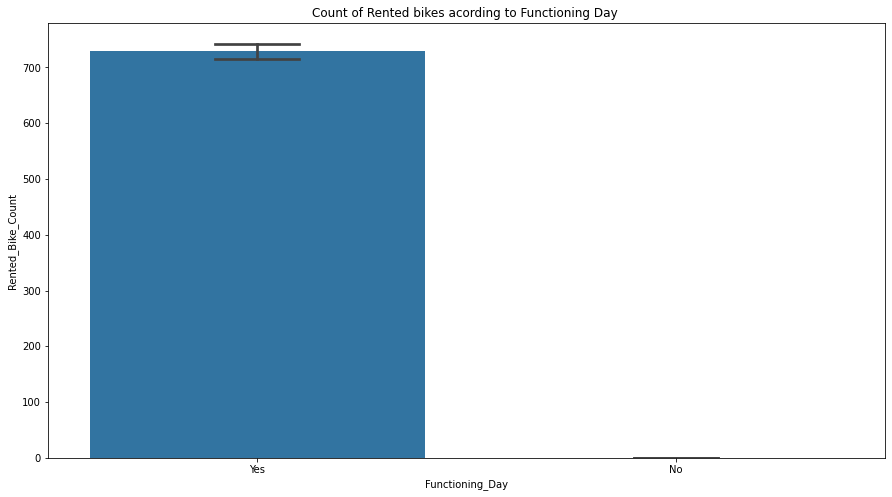

In [35]:
#anlysis of Functioning_day data by vizualisation
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(data=bike_df,x='Functioning_Day',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Functioning Day ')

[Text(0.5, 1.0, 'Count of Rented bikes acording to Functioning Day ')]

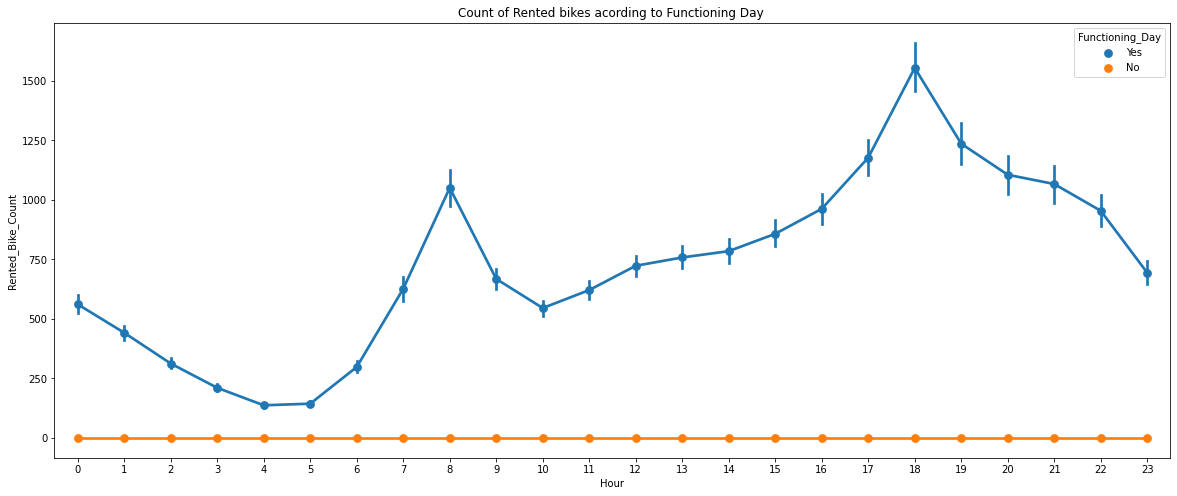

In [36]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=bike_df,x='Hour',y='Rented_Bike_Count',hue='Functioning_Day',ax=ax)
ax.set(title='Count of Rented bikes acording to Functioning Day ')

##**Observation**
* **In the above bar plot and point plot which shows the use of rented bike in functioning days and non-functioning days**
* **We observe that Peoples don't use reneted bikes in non-functioning day.**

[Text(0.5, 1.0, 'Count of Rented bikes acording to weekdays_weekends')]

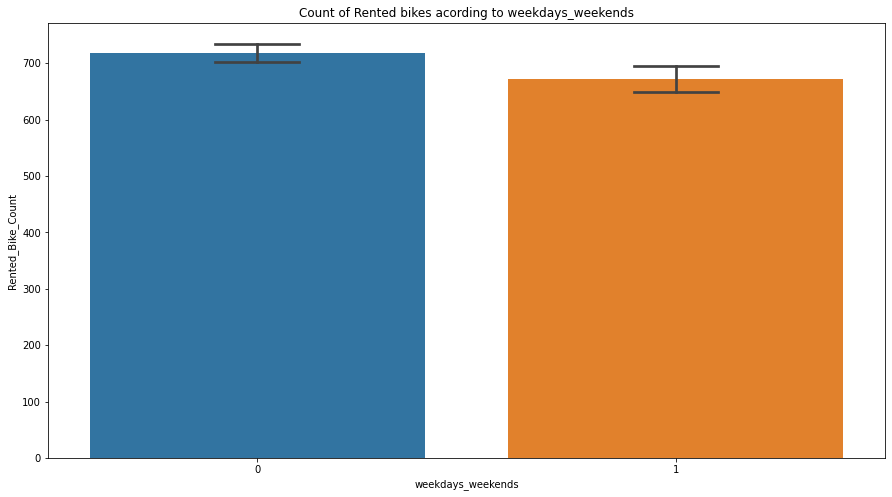

In [37]:
#analysis of weekdays_weekends data by vizualisation
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(data=bike_df,x='weekdays_weekends',y='Rented_Bike_Count',capsize=.2)
ax.set(title='Count of Rented bikes acording to weekdays_weekends')

[Text(0.5, 1.0, 'Count of Rented bikes acording to weekdays_weekends')]

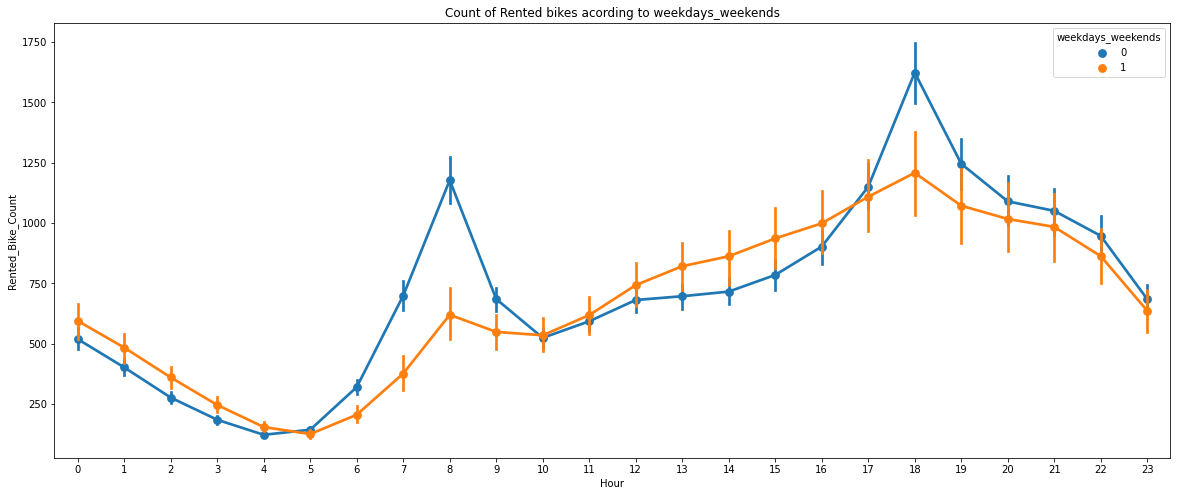

In [38]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=bike_df,x='Hour',y='Rented_Bike_Count',hue='weekdays_weekends',ax=ax)
ax.set(title='Count of Rented bikes acording to weekdays_weekends')

##**Observations**
* **From the above point plot and bar plot we can say that in the week days which represent in blue colur show that the demand of the bike higher because of the office or college.**
***Peak Time are 7 am to 9 am and 5 pm to 7 pm***
***The orange colur represent the weekend days, and it shows that the demand of rented bikes are very low specially in the morning hours but when the evening start from 4 pm to 8 pm the demand slightly increases.** 

#**Let's check the Distribution of all the Variables**


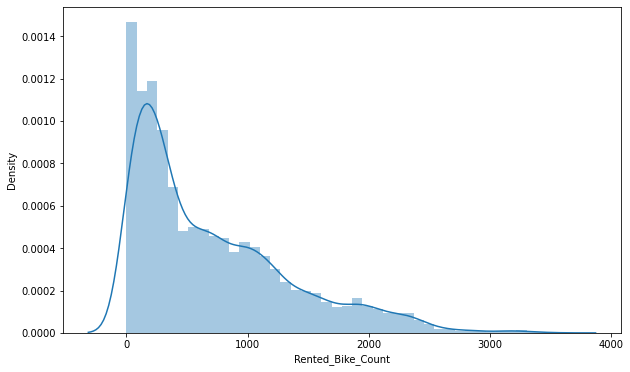

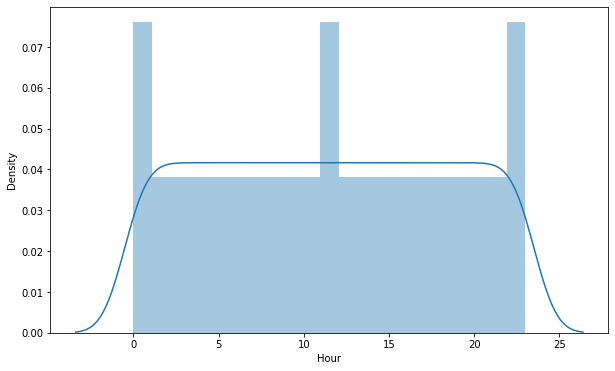

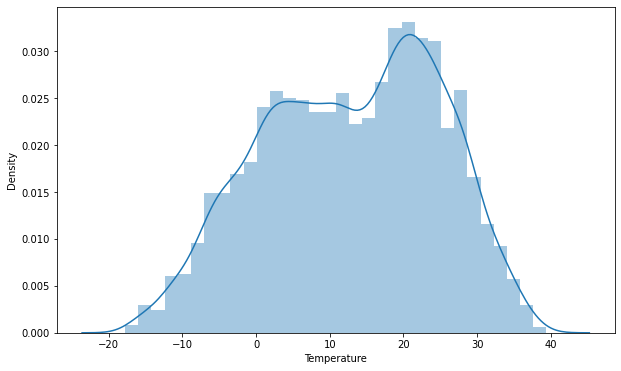

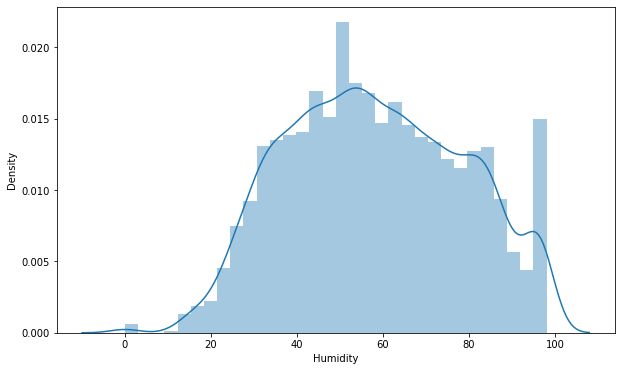

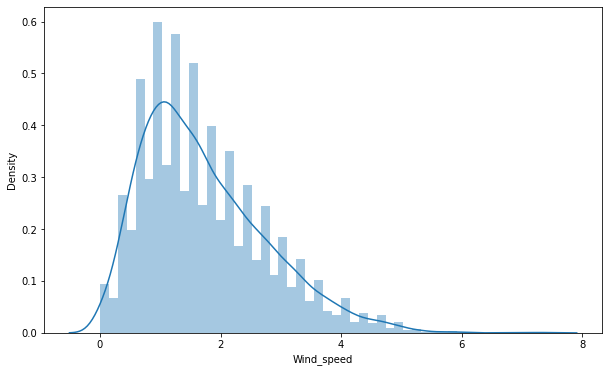

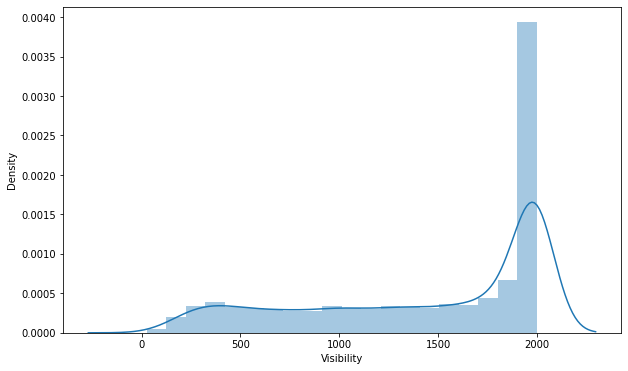

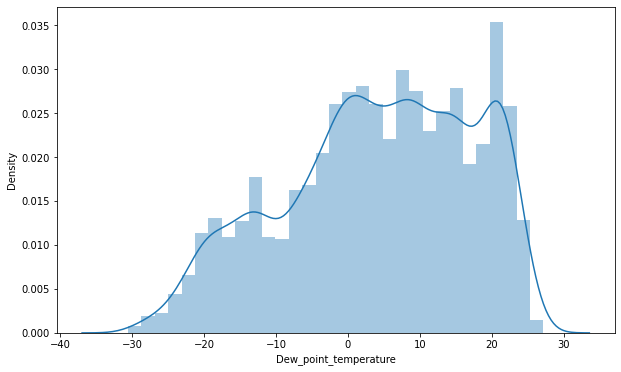

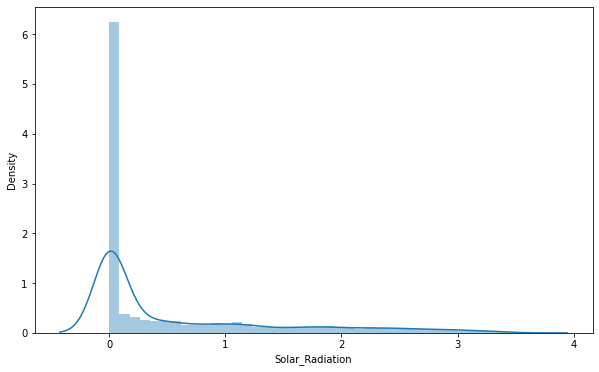

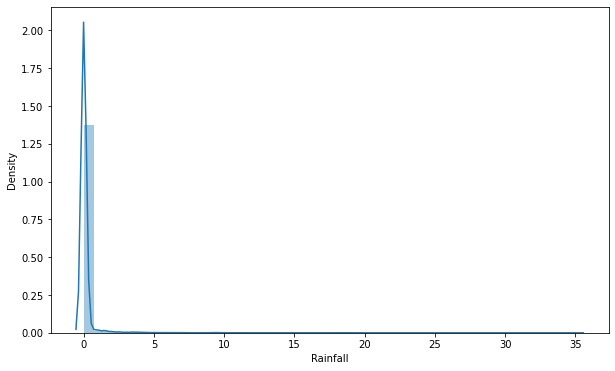

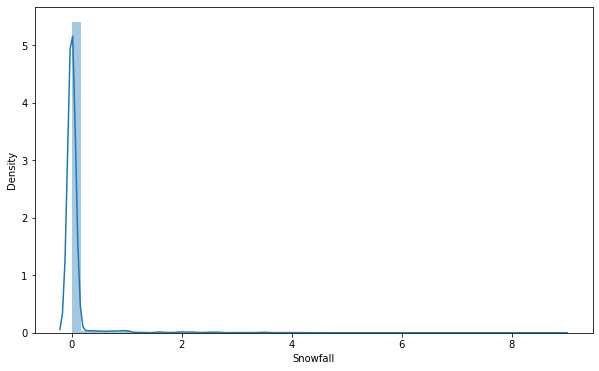

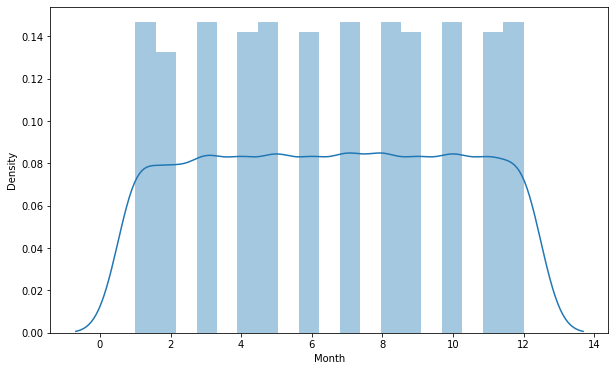

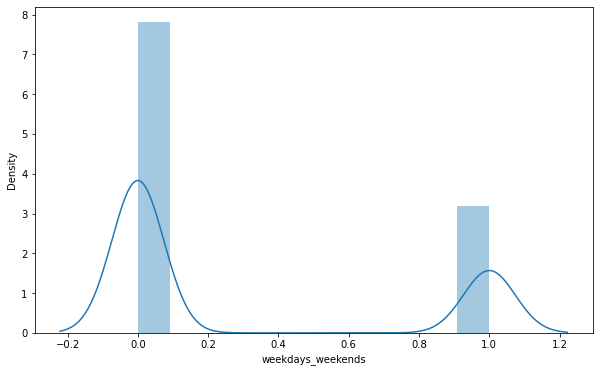

In [39]:
#printing displots to analyze the distribution of all numerical features
for col in numeric_col:
  plt.figure(figsize=(10,6))
  sns.distplot(x=bike_df[col])
  plt.xlabel(col)
plt.show()

#**Let's check the Relationship Between the Target and Independent variable**

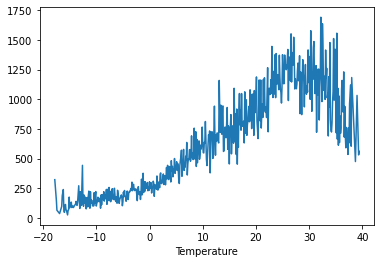

In [40]:
#Print the plot to analyze the relationship between "Rented_Bike_Count" and "Temperature"
bike_df.groupby('Temperature').mean()['Rented_Bike_Count'].plot()

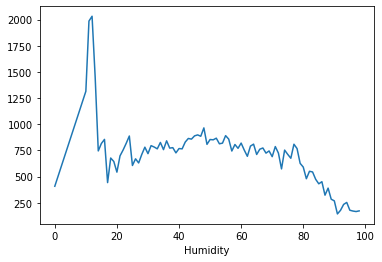

In [41]:
#Print the plot to analyze the relationship between "Rented_Bike_Count" and "Humidity"
bike_df.groupby('Humidity').mean()['Rented_Bike_Count'].plot()

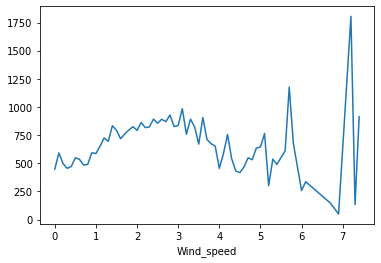

In [42]:
#Print the plot to analyze the relationship between "Rented_Bike_Count" and "Wind_speed"
bike_df.groupby('Wind_speed').mean()['Rented_Bike_Count'].plot()

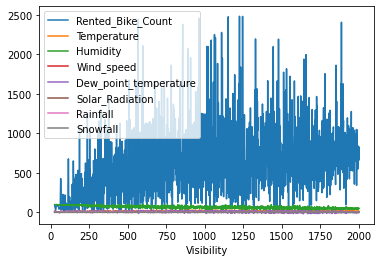

In [43]:
#Print the plot to analyze the relationship between "Rented_Bike_Count" and "Visibility"
bike_df.groupby('Visibility').mean(['Rented_Bike_Count']).plot()

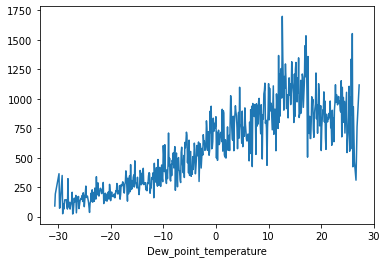

In [44]:
#Print the plot to analyze the relationship between "Rented_Bike_Count" and "Dew_point_temperature"
bike_df.groupby('Dew_point_temperature').mean()['Rented_Bike_Count'].plot()

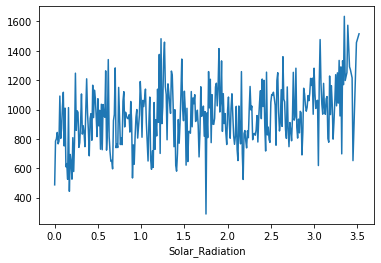

In [45]:
#Print the plot to analyze the relationship between "Rented_Bike_Count" and "Solar_Radiation"
bike_df.groupby('Solar_Radiation').mean()['Rented_Bike_Count'].plot()

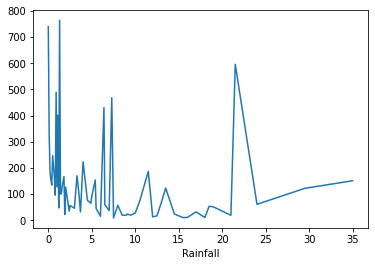

In [46]:
#Print the plot to analyze the relationship between "Rented_Bike_Count" and "Rainfall"
bike_df.groupby('Rainfall').mean()['Rented_Bike_Count'].plot()

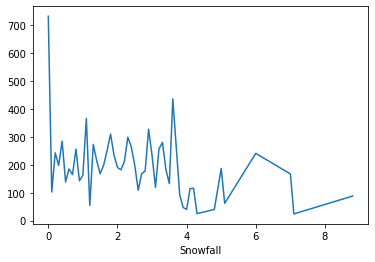

In [47]:
#Print the plot to analyze the relationship between "Rented_Bike_Count" and "Snowfall"
bike_df.groupby('Snowfall').mean()['Rented_Bike_Count'].plot()

#**Regresion Plot**

In [48]:
#Create a Numerical columns 
numeric_col=bike_df.describe().columns.tolist()
numeric_col

['Rented_Bike_Count',
 'Temperature',
 'Humidity',
 'Wind_speed',
 'Visibility',
 'Dew_point_temperature',
 'Solar_Radiation',
 'Rainfall',
 'Snowfall']

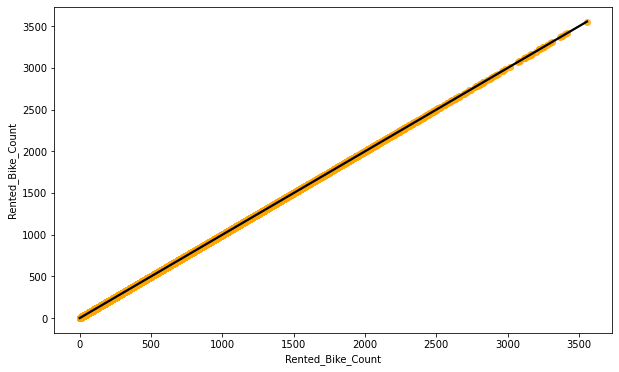

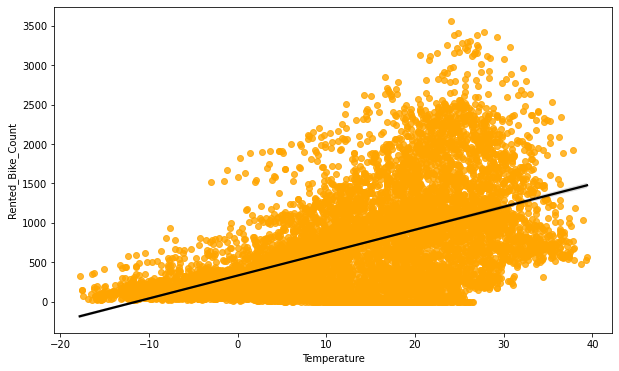

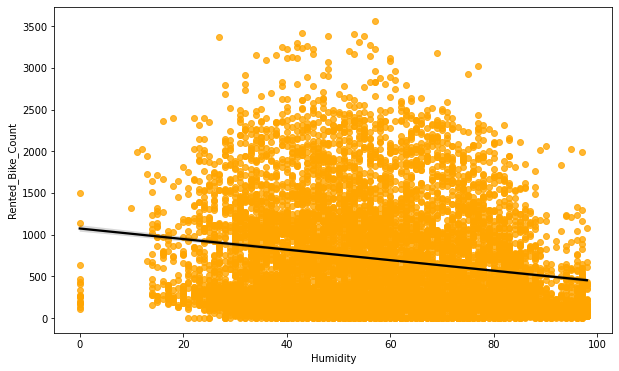

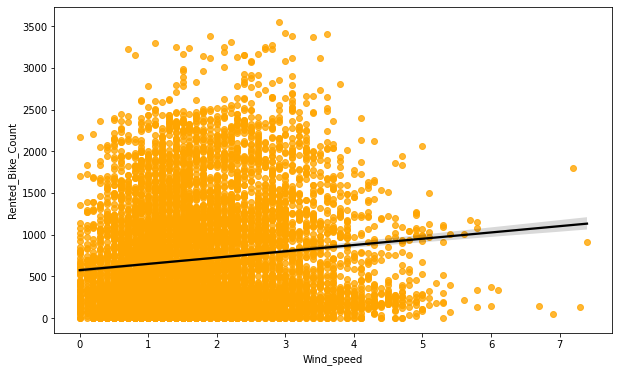

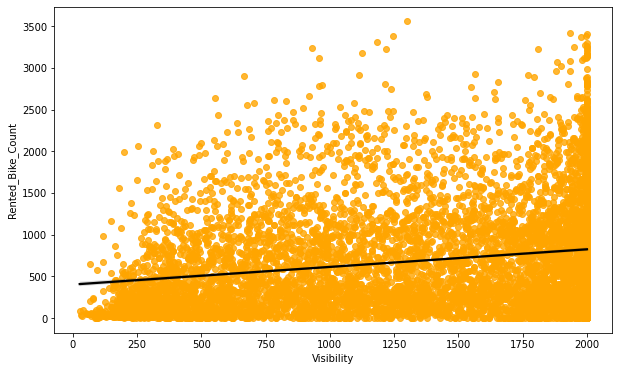

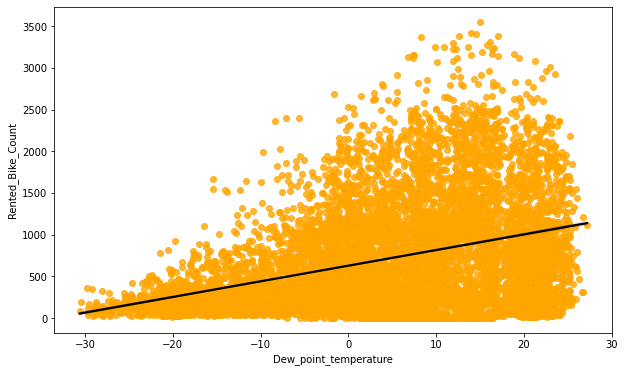

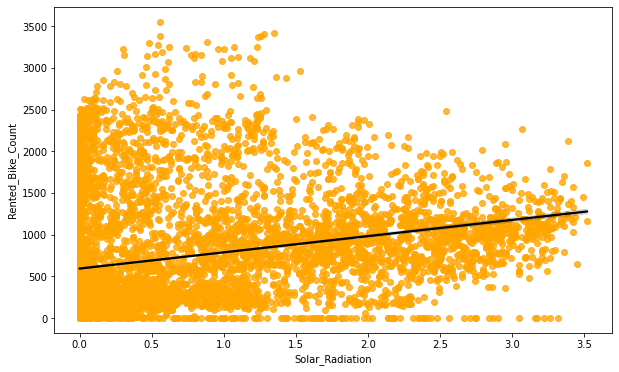

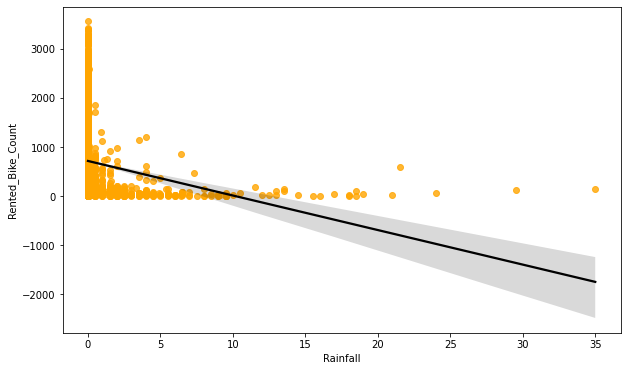

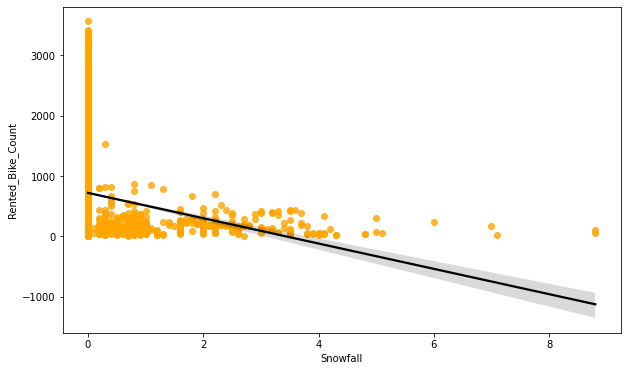

In [49]:
#printing the regression plot for all the numerical features
for col in numeric_col:
  fig,ax=plt.subplots(figsize=(10,6))
  sns.regplot(x=bike_df[col],y=bike_df['Rented_Bike_Count'],scatter_kws={"color": 'orange'}, line_kws={"color": "black"})

* **From the above regression plot of all numerical features we see that the columns  'Temperature', 'Wind_speed','Visibility', 'Dew_point_temperature', 'Solar_Radiation' are positively relation to the target variable.**


* **which means the rented bike count increases with increase of these features.**
* **'Rainfall', 'Snowfall', 'Humidity' these features are negatively related with the target variable which means the rented bike count decreases when these features increase.**

#**Normalise Rented_Bike_Count data column (Dependent Variable)**

* **The data normalization (also referred to as data pre-processing) is a basic element of data mining. It means transforming the data, namely converting the source data in to another format that allows processing data effectively. The main purpose of data normalization is to minimize or even exclude duplicated data**

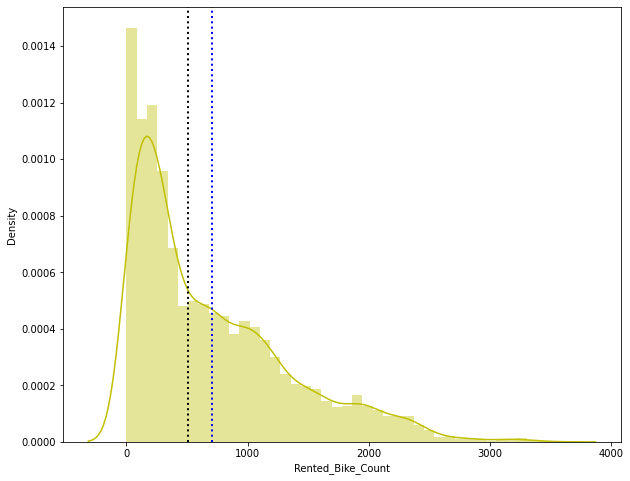

In [50]:
#Distribution plot for Rented_Bike_Count
plt.figure(figsize=(10,8))
plt.xlabel('Rented_Bike_Count')
plt.ylabel('Density')
ax=sns.distplot(bike_df['Rented_Bike_Count'],hist=True,color= 'y')
ax.axvline(bike_df['Rented_Bike_Count'].mean(),color='blue', linestyle='dotted',linewidth=2)
ax.axvline(bike_df['Rented_Bike_Count'].median(), color='black', linestyle='dotted', linewidth=2)
plt.show()

* **The above graph shows that Rented Bike Count has moderate right skewness. Since the assumption of linear regression is that 'the distribution of dependent variable has to be normal', so we should perform some operation to make it normal.**

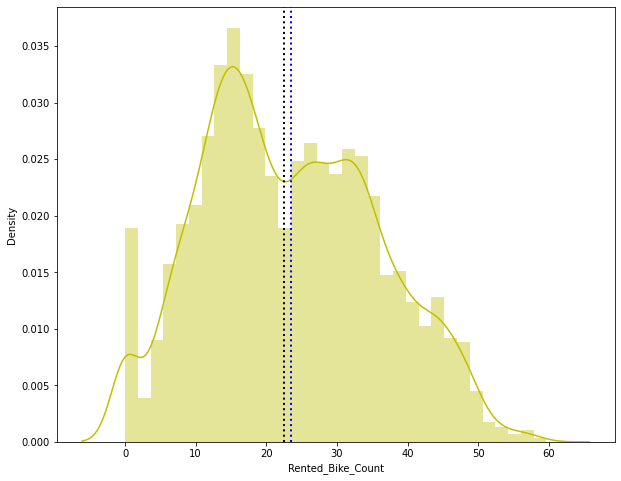

In [51]:
#Let's normalise the right skeweness of Dependent variable
plt.figure(figsize=(10,8))
plt.xlabel('Rented_Bike_Count')
plt.ylabel('Density')
ax=sns.distplot(np.sqrt(bike_df['Rented_Bike_Count']), color='y')
ax.axvline(np.sqrt(bike_df['Rented_Bike_Count']).mean(), color='blue', linestyle='dotted', linewidth=2)
ax.axvline(np.sqrt(bike_df['Rented_Bike_Count']).median(),color='black', linestyle='dotted', linewidth=2)

plt.show()

* **We have generic rule of applying Square root for the skewed variable in order to make it normal. After applying Square root to the skewed Rented Bike Count, here we get almost normal distribution.**

#**Checking Corelation between Independent and Dependent variable**

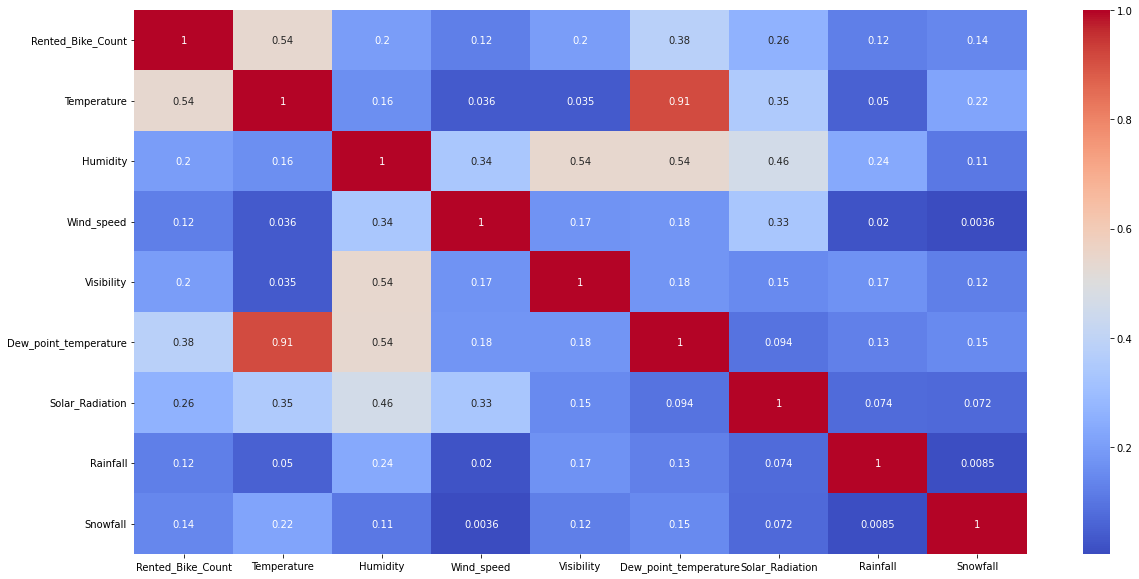

In [52]:
#plot the corelation map
plt.figure(figsize=(20,10))
corr=bike_df.corr()
sns.heatmap(data=abs(corr), annot=True, cmap='coolwarm')


 * **Temperature and Dew point Temperature are highly correlated.**

* **As per our regression assumption, there should not be colinearity between independent variables.**
* **We can see from the heatmap that "Temperature" and "Dew Point Temperature" are highly corelated. We can drop one of them. As the corelation between temperature and our dependent variable "Bike Rented Count" is high. So we will Keep the Temperature column and drop the "Dew Point Temperature" column.**

In [53]:
#Drop the Dew point temperature column
bike_df=bike_df.drop(['Dew_point_temperature'],axis=1)

In [54]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Rented_Bike_Count  8760 non-null   int64   
 1   Hour               8760 non-null   category
 2   Temperature        8760 non-null   float64 
 3   Humidity           8760 non-null   int64   
 4   Wind_speed         8760 non-null   float64 
 5   Visibility         8760 non-null   int64   
 6   Solar_Radiation    8760 non-null   float64 
 7   Rainfall           8760 non-null   float64 
 8   Snowfall           8760 non-null   float64 
 9   Seasons            8760 non-null   object  
 10  Holiday            8760 non-null   object  
 11  Functioning_Day    8760 non-null   object  
 12  Month              8760 non-null   category
 13  weekdays_weekends  8760 non-null   category
dtypes: category(3), float64(5), int64(3), object(3)
memory usage: 779.8+ KB


#**Creating Dummy Variable for Model Training**

**A dataset may contain various type of values like integer values, categorical values, etc. So, in-order to use those categorical value for programming efficiently we create dummy variables.**

In [55]:
#Assign categorical values to a variable
categorical = list(bike_df.select_dtypes(['object','category']))
categorical = pd.Index(categorical)
categorical

Index(['Hour', 'Seasons', 'Holiday', 'Functioning_Day', 'Month',
       'weekdays_weekends'],
      dtype='object')

#**One Hot Encoding**

**Many machine learning algorithms cannot work with categorical data directly. The categories must be converted into numbers or in numerical data type. This is required for both input and output variables.**

In [56]:
#Let's Create a copy
bike_df_copy = bike_df

In [57]:
#Let's do the One Hot Encoding
def one_hot_encoding(data,column):
  data = pd.concat([data,pd.get_dummies(data[column], prefix=column, drop_first=True)], axis=1)
  data = data.drop([column], axis=1)
  return data

for column in categorical:
  bike_df_copy = one_hot_encoding(bike_df_copy, column)

bike_df_copy.head()

,Rented_Bike_Count,Temperature,Humidity,Wind_speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Hour_1,Hour_2,...,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,weekdays_weekends_1
0,254,-5.2,37,2.2,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,204,-5.5,38,0.8,2000,0.0,0.0,0.0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,173,-6.0,39,1.0,2000,0.0,0.0,0.0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,107,-6.2,40,0.9,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,78,-6.0,36,2.3,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0


#**Model Training**

#**Train Test Split For Regression**

Before, fitting any model it is a rule of thumb to split the dataset into a training and test set. This means some proportions of the data will go into training the model and some portion will be used to evaluate(test) how our model is performing on any unseen data. In this step we will split our data into training and testing set using scikit learn library.

In [58]:
#Dependent Variable
dependent_variable = 'Rented_Bike_Count'

In [59]:
dependent_variable

'Rented_Bike_Count'

In [60]:
#Independent_variable
independent_variable = list(set(bike_df_copy.columns.tolist())-{dependent_variable}) 

In [61]:
independent_variable

['Month_4',
 'Hour_14',
 'Month_11',
 'Snowfall',
 'Hour_2',
 'Month_3',
 'Hour_15',
 'Hour_3',
 'Month_9',
 'Visibility',
 'Month_8',
 'Hour_22',
 'Temperature',
 'Solar_Radiation',
 'Hour_12',
 'Hour_21',
 'Rainfall',
 'Hour_1',
 'weekdays_weekends_1',
 'Hour_5',
 'Hour_6',
 'Month_6',
 'Hour_17',
 'Hour_4',
 'Month_10',
 'Hour_13',
 'Seasons_Winter',
 'Month_12',
 'Humidity',
 'Hour_20',
 'Wind_speed',
 'Seasons_Spring',
 'Hour_10',
 'Hour_23',
 'Hour_7',
 'Hour_16',
 'Month_5',
 'Hour_11',
 'Hour_8',
 'Functioning_Day_Yes',
 'Month_7',
 'Hour_19',
 'Month_2',
 'Holiday_No Holiday',
 'Hour_9',
 'Seasons_Summer',
 'Hour_18']

In [62]:
#Assign the value in X and y
X = bike_df_copy[independent_variable]
y = np.sqrt(bike_df_copy[dependent_variable])

In [63]:
X.head()

,Month_4,Hour_14,Month_11,Snowfall,Hour_2,Month_3,Hour_15,Hour_3,Month_9,Visibility,...,Hour_11,Hour_8,Functioning_Day_Yes,Month_7,Hour_19,Month_2,Holiday_No Holiday,Hour_9,Seasons_Summer,Hour_18
0,0,0,0,0.0,0,0,0,0,0,2000,...,0,0,1,0,0,0,1,0,0,0
1,0,0,0,0.0,0,0,0,0,0,2000,...,0,0,1,0,0,0,1,0,0,0
2,0,0,0,0.0,1,0,0,0,0,2000,...,0,0,1,0,0,0,1,0,0,0
3,0,0,0,0.0,0,0,0,1,0,2000,...,0,0,1,0,0,0,1,0,0,0
4,0,0,0,0.0,0,0,0,0,0,2000,...,0,0,1,0,0,0,1,0,0,0


In [64]:
y.head()

0    15.937377
1    14.282857
2    13.152946
3    10.344080
4     8.831761
Name: Rented_Bike_Count, dtype: float64

#**Spliting the Dataset into Train and Test data**

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print(X_train.shape)
print(X_test.shape)

(6132, 47)
(2628, 47)


#**Linear Regression**

**Regression models describe the relationship between variables by fitting a line to the observed data. Linear regression models use a straight line.**

Linear regression uses a linear approach to model the relationship between independent and dependent variables. In simple words its a best fit line drawn over the values of independent variables and dependent variable. In case of single variable, the formula is same as straight line equation having an intercept and slope.

$$ \text{y_pred} = \beta_0 + \beta_1x$$

where $$\beta_0 \text{ and } \beta_1$$ are intercept and slope respectively.

In case of multiple features the formula translates into:

$$ \text{y_pred} = \beta_0 + \beta_1x_1 + \beta_2x_2 +\beta_3x_3 +.....$$

where x_1,x_2,x_3 are the features values and 
$$\beta_0,\beta_1,\beta_2.....$$
 are weights assigned to each of the features. These become the parameters which the algorithm tries to learn using Gradient descent.

Gradient descent is the process by which the algorithm tries to update the parameters using  a loss function . Loss function is nothing but the diffence between the actual values and predicted values(aka error or residuals). There are different types of loss function but this is the simplest one. Loss function summed over all observation gives the cost functions. The role of gradient descent is to update the parameters till the cost function is minimized i.e., a global minima is reached. It uses a hyperparameter 'alpha' that gives a weightage to the cost function and decides on how big the steps to take. Alpha is called as the learning rate. It is always necesarry to keep an optimal value of alpha as high and low values of alpha might make the gradient descent overshoot or get stuck at a local minima. There are also some basic assumptions that must be fulfilled before implementing this algorithm. They are:

1. No multicollinearity in the dataset.

2. Independent variables should show linear relationship with dv.

3. Residual mean should be 0 or close to 0.

4. There should be no heteroscedasticity i.e., variance should be constant along the line of best fit.



Let us now implement our first model.
We will be using LinearRegression from scikit library.

In [66]:
#Implementation of Linear Regression
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

* The mean squared error (MSE) tells you how close a regression line is to a set of points. It does this by taking the distances from the points to the regression line (these distances are the “errors”) and squaring them.
It’s called the mean squared error as you’re finding the average of a set of errors. The lower the MSE, the better the forecast.

* MSE formula = (1/n) * Σ(actual – forecast)2
Where:

*   n = number of items,
* Σ = summation notation,
* Actual = original or observed y-value,
* Forecast = y-value from regression.

* Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction errors).

* Mean Absolute Error (MAE) are metrics used to evaluate a Regression Model. ... Here, errors are the differences between the predicted values (values predicted by our regression model) and the actual values of a variable.

* R-squared (R2) is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.

* Formula for R-Squared
\begin{aligned} &\text{R}^2 = 1 - \frac{ \text{Unexplained Variation} }{ \text{Total Variation} } \\ \end{aligned} 
​
  
* R 
2
 =1− 
Total Variation
Unexplained Variation
​

* Adjusted R-squared is a modified version of R-squared that has been adjusted for the number of predictors in the model.

In [67]:
#Let's check the score
reg.score(X_train, y_train)

0.757069847856142

In [126]:
#Let's check the score
reg.score(X_test, y_test)

0.7624852017835758

In [68]:
#Check the Coefficient
reg.coef_

array([ 3.79951288e-01, -3.55355132e+00,  1.20124482e+00,  5.33718779e-02,
       -5.08043073e+00,  5.83399915e-01, -2.28375898e+00, -7.44214301e+00,
        5.14354434e-01,  5.75110909e-04, -6.04634408e-01,  4.96069234e+00,
        4.74499169e-01,  1.04152521e+00, -3.24713663e+00,  6.31817907e+00,
       -1.48293847e+00, -2.14355101e+00, -7.15027101e-01, -9.03870462e+00,
       -4.18982233e+00,  4.38634875e+00,  3.66430301e+00, -9.53099886e+00,
        2.42046217e+00, -3.22428926e+00, -6.52458054e+00,  1.32339345e+00,
       -1.41232270e-01,  6.06210166e+00, -1.57051217e-01, -2.58208795e+00,
       -3.46440528e+00,  1.27138071e+00,  2.18554157e+00,  1.20310957e-01,
        1.67148718e+00, -3.87774187e+00,  7.10507191e+00,  2.77281537e+01,
        3.18242453e-02,  6.75692169e+00, -6.45595345e-01,  3.14081483e+00,
        7.74729790e-01, -3.25945853e+00,  1.01691783e+01])

In [94]:
#Get the X_train and X-test value
y_pred_train = reg.predict(X_train)
y_pred_test = reg.predict(X_test)

In [95]:
#Calculate Mean Square Error
MSE_for_LR =  mean_squared_error(y_train, y_pred_train)
print('Mean_Squared_Error_for_Linear_Regression : ',MSE_for_LR)

#Calculate Mean Absolute error
MAE_for_LR = mean_absolute_error(y_train, y_pred_train)
print('Mean_Absolute_Error_for_Linear_Regression :',MAE_For_LR)

#Calculate Root Mean Square Error
RMSE_for_LR = np.sqrt(MSE_for_LR)
print('Root_Mean_Square_Error_For_Linear_Regression :', RMSE_For_LR)

#Calculate r2 Score
r2_score_for_LR = r2_score(y_train, y_pred_train)
print('r2_score_for_LR :', r2_score_for_LR)

#Calculate Adjusted r2 Score
Adjusted_r2_score_for_lr = (1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted_r2_score_for_LR :",1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


Mean_Squared_Error_for_Linear_Regression :  37.78839448296065
Mean_Absolute_Error_for_Linear_Regression : 4.665266785340195
Root_Mean_Square_Error_For_Linear_Regression : 6.040018076191182
r2_score_for_LR : 0.757069847856142
Adjusted_r2_score_for_LR : 0.752644376092281


**Our r2 score value is 0.75 that means our model is able to capture most of the data variance. Lets save it in a dataframe for later comparisons.**

In [96]:
#Storing the traning set metrics value in a dataframe for later comparison
dict1={'Model':'Linear regression ',
       'MAE':round((MAE_for_LR),3),
       'MSE':round((MSE_for_LR),3),
       'RMSE':round((RMSE_for_LR),3),
       'R2_score':round((r2_score_for_LR),3),
       'Adjusted R2':round((Adjusted_r2_score_for_lr ),2)
       }

#Creating traning result dataframe
LR_training_df=pd.DataFrame(dict1,index=[1])
LR_training_df



,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
1,Linear regression,4.666,37.788,6.147,0.757,0.75


In [97]:
#Calculate Mean Square Error
MSE_for_LR =  mean_squared_error(y_test, y_pred_test)
print('Mean_Squared_Error_for_Linear_Regression : ',MSE_for_LR)

#Calculate Mean Absolute error
MAE_For_LR = mean_absolute_error(y_test, y_pred_test)
print('Mean_Absolute_Error_for_Linear_Regression :',MAE_For_LR)

#Calculate Root Mean Square Error
RMSE_For_LR = np.sqrt(MSE_for_LR)
print('Root_Mean_Square_Error_For_Linear_Regression :', RMSE_For_LR)

#Calculate r2 Score
r2_score_for_LR = r2_score(y_test, y_pred_test)
print('r2_score_for_LR :', r2_score_for_LR)

#Calculate Adjusted r2 Score
Adjusted_r2_score_for_lr = (1-(1-r2_score(y_test, y_pred_test))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)) )
print("Adjusted_r2_score_for_LR :",1-(1-r2_score(y_test, y_pred_test))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)) )

Mean_Squared_Error_for_Linear_Regression :  36.481818360716225
Mean_Absolute_Error_for_Linear_Regression : 4.665266785340195
Root_Mean_Square_Error_For_Linear_Regression : 6.040018076191182
r2_score_for_LR : 0.7624852017835758
Adjusted_r2_score_for_LR : 0.7606503570241787


**The r2_score for the test set is 0.76. This means our linear model is  performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).**

In [99]:
#Storing the traning set metrics value in a dataframe for later comparison
dict2={'Model':'Linear regression ',
       'MAE':round((MAE_for_LR),3),
       'MSE':round((MSE_for_LR),3),
       'RMSE':round((RMSE_for_LR),3),
       'R2_score':round((r2_score_for_LR),3),
       'Adjusted R2':round((Adjusted_r2_score_for_lr),2)
       }

#Creating traning result dataframe
LR_testing_df=pd.DataFrame(dict2,index=[1])
LR_testing_df


,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
1,Linear regression,4.666,36.482,6.147,0.762,0.76


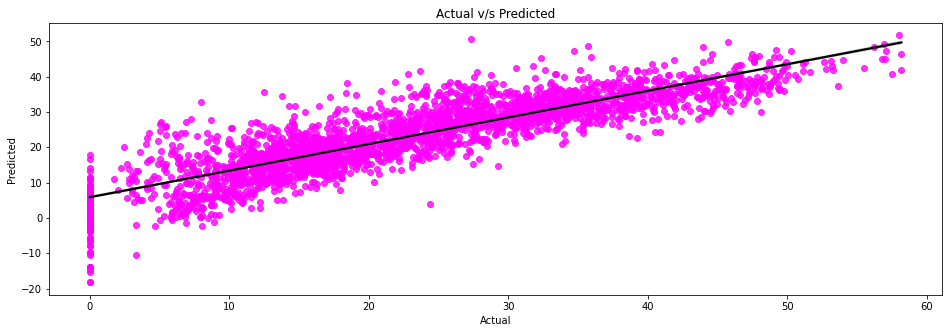

In [122]:
#Define a function to plot scatter plot for y_test and y_actual.
def plot_scatter(y_pred_test,y_test):
  '''Plot scatter plot for y_test values and 
  y_test values. To check how close we are to regresson line'''
  plt.figure(figsize=(16,5))
  sns.regplot(x=y_test,y=y_pred_test,scatter_kws={'color':'magenta'},line_kws={'color':'black'})
  plt.xlabel('Actual')
  plt.ylabel("Predicted")
  plt.title("Actual v/s Predicted")
plot_scatter(y_pred_test,y_test)

#**Lasso Regression**

In [166]:
#Implementation of Lasso Regression
lasso_reg = Lasso(alpha=1, max_iter=3000)

In [167]:
#Fitting the model
lasso_reg.fit(X_train, y_train)

Lasso(alpha=1, max_iter=3000)

In [168]:
#Let's check the score
lasso_reg.score(X_train, y_train)

0.40468943146227465

In [169]:
#Let's check the score
lasso_reg.score(X_test, y_test)

0.39228452696184946

In [170]:
#Check the Coefficient
lasso_reg.coef_

array([-0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  1.83829003e-04, -0.00000000e+00,  0.00000000e+00,
        6.09832582e-01, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -5.60426424e-01, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -1.82402698e-01,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00])

In [171]:
#check the intercept
lasso_reg.intercept_

26.13435359313411

In [172]:
#Get the X_train and X-test value
y_pred_train_lasso = lasso_reg.predict(X_train)
y_pred_test_lasso = lasso_reg.predict(X_test)

In [173]:
#Calculate Mean Square Error
MSE_for_lasso =  mean_squared_error(y_train, y_pred_train_lasso)
print('Mean_Squared_Error_for_Lasso_Regression : ',MSE_for_lasso)

#Calculate Mean Absolute error
MAE_for_lasso = mean_absolute_error(y_train, y_pred_train_lasso)
print('Mean_Absolute_Error_for_Lasso_Regression :' , MAE_for_lasso)

#Calculate Root Mean Square Error
RMSE_for_lasso = np.sqrt(MSE_for_lasso)
print('Root_Mean_Square_Error_For_Lasso_Regression :', RMSE_for_lasso)

#Calculate r2 Score
r2_score_for_lasso = r2_score(y_train, y_pred_train_lasso)
print('r2_score_for_lasso :', r2_score_for_lasso)

#Calculate Adjusted r2 Score
Adjusted_r2_score_for_lasso = (1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted_r2_score_for_lasso :",1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

Mean_Squared_Error_for_Lasso_Regression :  92.60205209297197
Mean_Absolute_Error_for_Lasso_Regression : 7.286121994453684
Root_Mean_Square_Error_For_Lasso_Regression : 9.622996003998546
r2_score_for_lasso : 0.40468943146227465
Adjusted_r2_score_for_lasso : 0.3938446265315487


**Our r2 score value is 0.40 that means our model is not able to capture most of the data variance. Lets save it in a dataframe for later comparisons.**

In [174]:
#Storing the traning set metrics value in a dataframe for later comparison
dict3={'Model':'Lasso regression ',
       'MAE':round((MAE_for_lasso),3),
       'MSE':round((MSE_for_lasso),3),
       'RMSE':round((RMSE_for_lasso),3),
       'R2_score':round((r2_score_for_lasso),3),
       'Adjusted R2':round((Adjusted_r2_score_for_lasso),2)
       }

#Creating traning result dataframe
lasso_training_df=pd.DataFrame(dict3,index=[1])
lasso_training_df


,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
1,Lasso regression,7.286,92.602,9.623,0.405,0.39


In [175]:
#Calculate Mean Square Error
MSE_for_lasso =  mean_squared_error(y_test, y_pred_test_lasso)
print('Mean_Squared_Error_for_Lasso_Regression : ',MSE_for_lasso)

#Calculate Mean Absolute error
MAE_for_lasso = mean_absolute_error(y_test, y_pred_test_lasso)
print('Mean_Absolute_Error_for_Lasso_Regression :' , MAE_for_lasso)

#Calculate Root Mean Square Error
RMSE_for_lasso = np.sqrt(MSE_for_lasso)
print('Root_Mean_Square_Error_For_Lasso_Regression :', RMSE_for_lasso)

#Calculate r2 Score
r2_score_for_lasso = r2_score(y_test, y_pred_test_lasso)
print('r2_score_for_lasso :', r2_score_for_lasso)

#Calculate Adjusted r2 Score
Adjusted_r2_score_for_lasso = (1-(1-r2_score(y_test, y_pred_test_lasso))*((X_test.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)) )
print("Adjusted_r2_score_for_lasso :",1-(1-r2_score(y_test, y_pred_test_lasso))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)) )

Mean_Squared_Error_for_Lasso_Regression :  93.3439333837745
Mean_Absolute_Error_for_Lasso_Regression : 7.335879347497634
Root_Mean_Square_Error_For_Lasso_Regression : 9.661466419947569
r2_score_for_lasso : 0.39228452696184946
Adjusted_r2_score_for_lasso : 0.38758981505639367


**The r2_score for the test set is 0.39. This means our linear model is not performing well on the data.**

In [177]:
#Storing the traning set metrics value in a dataframe for later comparison
dict4={'Model':'Lasso regression ',
       'MAE':round((MAE_for_lasso),3),
       'MSE':round((MSE_for_lasso),3),
       'RMSE':round((RMSE_for_lasso),3),
       'R2_score':round((r2_score_for_lasso),3),
       'Adjusted R2':round((Adjusted_r2_score_for_lasso),2)
       }

#Creating traning result dataframe
lasso_test_df=pd.DataFrame(dict4,index=[1])
lasso_test_df


,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
1,Lasso regression,7.336,93.344,9.661,0.392,0.74


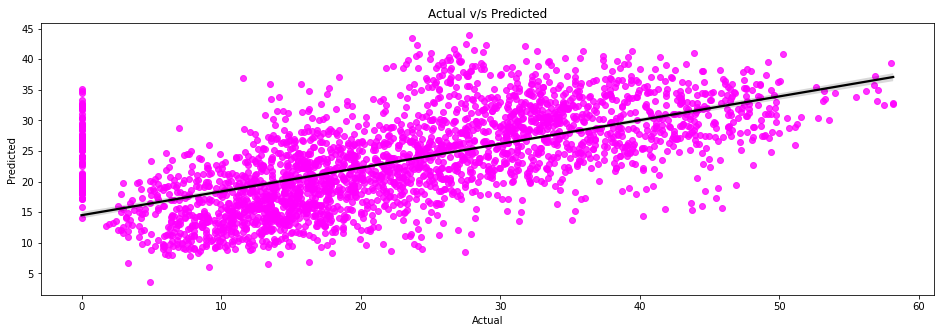

In [178]:
#Define a function to plot scatter plot for y_test and y_actual.
def plot_scatter(y_pred_test_lasso,y_test):
  '''Plot scatter plot for y_test values and 
  y_test values. To check how close we are to regresson line'''
  plt.figure(figsize=(16,5))
  sns.regplot(x=y_test,y=y_pred_test_lasso,scatter_kws={'color':'magenta'},line_kws={'color':'black'})
  plt.xlabel('Actual')
  plt.ylabel("Predicted")
  plt.title("Actual v/s Predicted")
plot_scatter(y_pred_test_lasso,y_test)